In [1]:
import os
import imp
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas
from IPython.display import display, Math

###############################################################
# LINUX PATH

sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname("/home/fotonica04/Documentos/GitHub/MMI-photonics")) #Current directory


###############################################################
# WINDOWS PATH

# spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
# lumapi = importlib.util.module_from_spec(spec_win)
# os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
# sys.path.append(os.path.dirname('C:/Users/Caio/Documents/GitHub/Photonics-training/Projects/MMI/Lumericalfiles/'))
# spec_win.loader.exec_module(lumapi)

#alteração 2

In [2]:
lum = lumapi.MODE(filename='MMI_sweep1.lms') 

In [3]:
def DeletarObj(nome, lum):
    lum.select(nome)
    lum.delete()

In [4]:
def CriarRect(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, material, lum):
    
    lum.addrect()
    lum.set({
        "name": nome,
        "x min": Xmin,"y": Y,"z min": Zmin,
        "x max": Xmax, "y span": Yspan, "z max": Zmax,
        "material": material
        })

In [5]:
def CriarTP(nome, Xmin, Xmax, Y, Yspan1, Yspan2, Zmin, Zmax, material, lum):

    X = (Xmin + Xmax)/2
    Xspan = Xmax-Xmin
    Z = (Zmin + Zmax)/2
    Zspan = Zmax-Zmin

    lum.addobject("linear_taper")
    lum.set({
        "name": nome,
        "x": X, "y": Y, "z": Z,
        "thickness": Zspan, 
        "angle_side": 90, 
        "width_l": Yspan1,
        "width_r": Yspan2,
        "len": Xspan,
        "material": material
    })

In [6]:
def CriarMesh(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, propY, propZ, lum):
    lum.addmesh()
    lum.set({
        "name": nome,
        "x min": Xmin, "y": Y, "z min": Zmin,
        "x max": Xmax, "y span": Yspan, "z max": Zmax,
        "set equivalent index": True, "set mesh multiplier": True,
        "override x mesh": False, "y mesh multiplier": propY, "z mesh multiplier": propZ
        })


In [7]:
def altRect(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, material, lum):
    DeletarObj(nome, lum)
    CriarRect(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, material, lum)

In [8]:
def altTP(nome, Xmin, Xmax, Y, Yspan1, Yspan2, Zmin, Zmax, material, lum):
    DeletarObj(nome, lum)
    CriarTP(nome, Xmin, Xmax, Y, Yspan1, Yspan2, Zmin, Zmax, material, lum)

In [9]:
def altMesh(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, propY, propZ, lum):
    DeletarObj(nome, lum)
    CriarMesh(nome, Xmin, Xmax, Y, Yspan, Zmin, Zmax, propY, propZ, lum)

In [10]:
lum.switchtolayout()

inicioMMI = 0
compMMI = 37.2947e-6
largMMI = 6e-6
zmin = 0
zspan = 220e-9
zspanMMI = 8e-6
ycentro = 0


largWG = .45e-6
bufferWG = 4e-6
compTP = 5e-6
largTP = 0.609367e-6
posSaida = 1.5e-6

material = "Si (Silicon) - Palik";
BGmaterial = "SiO2 (Glass) - Palik";


zmax = zmin + zspan
inicTPS = compMMI + inicioMMI
fimTPS = compTP + inicTPS
fimTPS1 = compTP + inicTPS
fimTPS2 = compTP + inicTPS
fimTPS3 = compTP + inicTPS
largTPE = largTP
largTPS1 = largTP
largTPS2 = largTP
largTPS3 = largTP
posSaida1 = ycentro + posSaida + 0.59e-6
posSaida2 = ycentro
posSaida3 = ycentro - posSaida - 0.55e-6



In [44]:
nomes = ["MMImeio", "Entrada", "Saida1", "Saida2", "Saida3", "EntradaTP", "Saida1TP", "Saida2TP", "Saida3TP"]
mesh = ["meshE", "meshS1", "meshS2", "meshS3"]

ncellsTP = 16
nmodosTP = 10
nmodosMMI = 100
mcy = 375
mcz = 75

meshY = 2
meshZ = 4

In [45]:
lum.switchtolayout()

altRect(nomes[0], inicioMMI, compMMI, ycentro, largMMI, zmin, zmax, material, lum)
altRect(nomes[1], inicioMMI-(compTP+bufferWG), inicioMMI, ycentro, largWG, zmin, zmax, material, lum)
altRect(nomes[2], inicTPS, fimTPS1+bufferWG, posSaida1, largWG, zmin, zmax, material, lum)
altRect(nomes[3], inicTPS, fimTPS2+bufferWG, posSaida2, largWG, zmin, zmax, material, lum)
altRect(nomes[4], inicTPS, fimTPS3+bufferWG, posSaida3, largWG, zmin, zmax, material, lum)
altTP(nomes[5], inicioMMI-compTP, inicioMMI, ycentro, largWG, largTPE, zmin, zmax, material, lum)
altTP(nomes[6], inicTPS, fimTPS1, posSaida1, largTPS1, largWG, zmin, zmax, material, lum)
altTP(nomes[7], inicTPS, fimTPS2, posSaida2, largTPS2, largWG, zmin, zmax, material, lum)
altTP(nomes[8], inicTPS, fimTPS3, posSaida3, largTPS3, largWG, zmin, zmax, material, lum)



In [46]:
lum.switchtolayout()
DeletarObj("EME", lum)

lum.addeme()
lum.set({
    "allow custom eigensolver settings":1, 
    "display cells":1, 
    "number of cell groups":5,

    "y min bc": "PML",
    "y max bc": "PML",
    "z min bc": "Symmetric",
    "z max bc": "PML"
})

lum.set({
    "mesh cells y": mcy,
    "mesh cells z": mcz,
    "group spans": np.transpose([compTP*0.25, compTP, compMMI, compTP, compTP*0.25]),
    "cells":np.transpose([1, ncellsTP, 1, ncellsTP, 1]),
    "subcell method":np.transpose([1, 1, 0, 1, 1]), # 0 = none,  1 = CVCS
    "modes":np.transpose([nmodosTP, nmodosTP, nmodosMMI, nmodosTP, nmodosTP]),
})

lum.set({
    "x min": inicioMMI-(compTP*1.25), "y":ycentro, "z": zmin+(zmax/2),
    "y span": largMMI*1.25, "z span": zspanMMI,
})


lum.set("background material", BGmaterial)

lum.addemeport()
lum.addemeport()
lum.select("EME::Ports::port_1")
lum.set({
    "port location": "left",
    "use full simulation span": 0,
    "y": ycentro, "z": zmin +(zspan/2),
    "y span": 5e-6, "z span": 3e-6
})

lum.select("EME::Ports::port_2")
lum.set({
    "port location": "right",
    "use full simulation span": 0,
    "y": posSaida1, "z": zmin +(zspan/2),
    "y span": posSaida*0.95, "z span": 3e-6
})
lum.select("EME::Ports::port_3")
lum.set({
    "port location": "right",
    "use full simulation span": 0,
    "y": posSaida2, "z": zmin +(zspan/2),
    "y span": posSaida*0.95, "z span": 3e-6
})
lum.select("EME::Ports::port_4")
lum.set({
    "port location": "right",
    "use full simulation span": 0,
    "y": posSaida3, "z": zmin +(zspan/2),
    "y span": posSaida*0.95, "z span": 3e-6
})

In [47]:
lum.switchtolayout()
altMesh(mesh[0], inicioMMI-compTP, inicioMMI, ycentro, largTPE, zmin, zmax, meshY, meshZ, lum)
altMesh(mesh[1], inicTPS, fimTPS1, posSaida1, largTPS1, zmin, zmax, meshY, meshZ, lum)
altMesh(mesh[2], inicTPS, fimTPS2, posSaida2, largTPS2, zmin, zmax, meshY, meshZ, lum)
altMesh(mesh[3], inicTPS, fimTPS3, posSaida3, largTPS3, zmin, zmax, meshY, meshZ, lum)


In [48]:
DeletarObj("monitor", lum)
lum.addemeprofile()
lum.set({
    "x min": inicioMMI-(compTP+bufferWG), "x max": fimTPS+bufferWG,
    "y": ycentro, "y span": largMMI*1.25,
    "z": (zmin+zmax)/2
})

In [49]:
lum.setnamed("")

lum.run()
lum.emepropagate()

KeyboardInterrupt: 

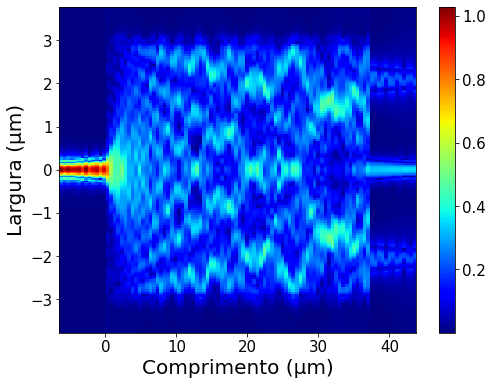

In [39]:


campo = lum.getresult("monitor", "field profile")
x = campo["x"]
y = campo["y"]
E = campo["E"]

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

plt.rcParams["figure.figsize"] = (8,6)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Comprimento (μm)',fontsize=20)
plt.ylabel('Largura (μm)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
#plt.savefig('Imagens/E linear.png')



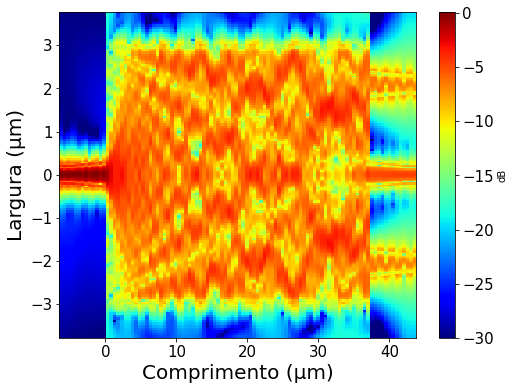

In [43]:
Elog = 10*np.log10(E)
plt.rcParams["figure.figsize"] = (8,6)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,Elog,cmap = 'jet',vmin=-30)
plt.xlabel('Comprimento (μm)',fontsize=20)
plt.ylabel('Largura (μm)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=15)
#plt.savefig('Imagens/E Log.png')

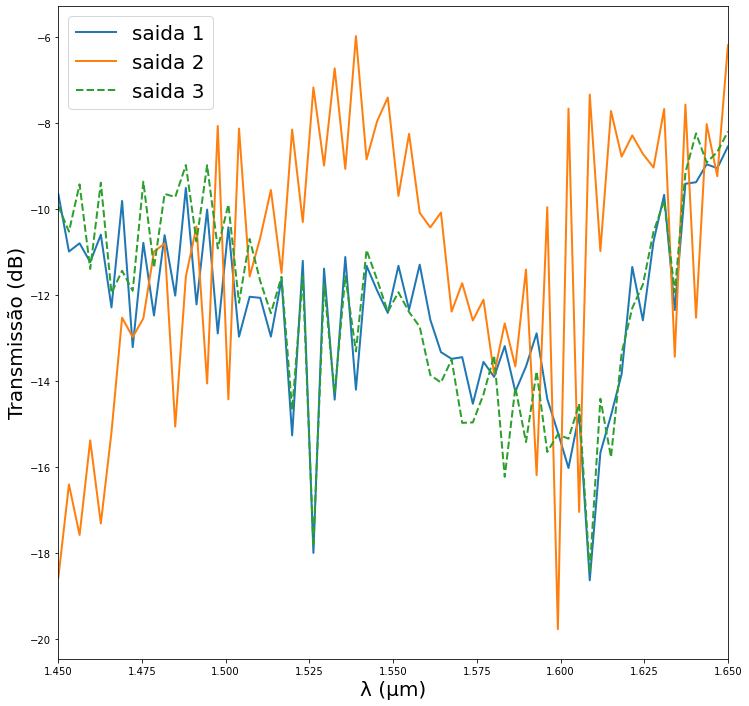

In [42]:
lum.setemeanalysis('wavelength sweep', 1)
lum.setemeanalysis('start wavelength', 1.45e-6)
lum.setemeanalysis('stop wavelength', 1.65e-6)
lum.setemeanalysis('number of wavelength points', 64)

lum.emesweep('wavelength sweep')

onda = lum.getemesweep('S_wavelength_sweep')

lmbd = onda['wavelength']*1e6

s21 = abs(onda['s21'])**2
s31 = abs(onda['s31'])**2
s41 = abs(onda['s41'])**2

plt.figure(figsize = (12,12))
plt.plot(lmbd, 10*np.log10(s21), linewidth = 2, label = "saida 1")
plt.plot(lmbd, 10*np.log10(s31), linewidth = 2, label = "saida 2")
plt.plot(lmbd, 10*np.log10(s41), '--', linewidth = 2, label = "saida 3")
plt.xlabel('λ (μm)', fontsize = 20)
plt.ylabel('Transmissão (dB)', fontsize = 20)
plt.xlim(1.45, 1.65)
#plt.ylim(-9, -6)
plt.legend(fontsize = 20)
#plt.grid(True)
#plt.savefig('Imagens/Wavelength sweep.png')

In [ ]:
# Body config------------------------------------
BdX_Span = 31.87e-6 # Body X Span
BdY_Span = 6e-6 # Body y Span


# Ports config-----------------------------------

OutMx = [1.6e-6,-1.6e-6] # Array of output ports y positions (put 0 on first element to ignore this line)
InMx = [0]               # Array of input ports y positions (put 0 on first element to ignore this line) 

# If the lines above has to be ignored, use these ones instead: 
InP = 1 # Number of Input ports
OutP = 2 # Number of Output ports
Asy = 0 # Force asymmetry on inputs ports auto-displacement (0 -> Symetry, 1 -> Asymmetry)
         
PYSpan_in = 12e-6 # Input Port Y Span 
PYSpan_out = 3e-6 # Output Port Y Span 


# Tappers config---------------------------------
SetToTappers = 1 # Set tappers as inputs/outputs
TLen = 4e-6 # Tapper Length
TWidth = 1.1e-6 # Tapper Width


# Mesh config------------------------------------
MeshEnableIn = 0 # enable input mesh insertion
MeshEnableOut = 1 # enable output mesh insertion
MeshType = 1 # 0 for Override, 1 for Multipler

MeshOver = [[0.05e-6,0.05e-6,0.05e-6] , [0.05e-6,0.05e-6,0.05e-6]] # Override mesh value dx,dy and dz ([[Input Mesh],[Output Mesh]])
MeshMultiplier = [[2,2,2] , [4,4,4]] # Mesh multipler value dx,dy and dz ([[Input Mesh],[Output Mesh]])


# EME config-------------------------------------
EME_MC = 100 # Number of EME Mesh Cells (Y and Z)
SideCells = 4 # Number of Cells on Input/Output groups